## Brown Applied Computing
### Software Workshop: Deepfakes, cryptography, and AI

**Scenario:** Vector has just gained access to the latest AI deepfake technology and is using it to spread misinformation about Gru. He has created false media showing Gru doing things such as rescuing innocent citizens in trouble, being friendly to his neighbors, and and raising money for charity. Naturally, as a supervillain, Gru is unhappy about this. **Help Gru use cryptography to expose Vector's misinformation campaign and restore his reputation as a supervillain!**

![Gru using a freeze ray on Vector](https://wallpapers.com/images/hd/despicable-me-gru-vs-vector-e8twxs81xaoa3m5h.jpg)

In [2]:
# We will start with some large prime numbers p and q. It is important that p-1 is divisible by q.
p = 199933
q = 16661
assert ((p-1)/q) % 1.0 == 0 # check divisibility

Now we have to do just a little bit of math. Bear with us!

Let's talk about **exponentiation** and **logarithms**. Remember, a logarithm is the inverse of exponentiation. Exponentiation is something like $2^{10} = 1024$. Logarithms work like $\log_2 (1024) = 10$.

In [3]:
def fast_exp(base, exp):
    # O(log n)
    res = pow(base, exp//2, p)
    res = pow(res, 2, p) # squaring a number is super fast!
    if exp % 2 == 1:
        res *= base
        res %= p
    return res
def slow_log(base, num):
    # O(n)
    res = 0
    while num > 1:
        num *= pow(base, -1, p) # keep multiplying by base^-1 mod p until we get to 1...
        num %= p
        res += 1
    return res

It's important to note that taking a power is *much* faster than taking a logarithm. While exponentiation is $O(\log n)$, logarithms are $O(n)$. With the giant numbers used in practical cryptographic systems, this makes a big difference. Let's see it in action:

In [4]:
# You don't need to understand this code, just run it and see the output
import time
def time_exp_log(base, exp, disp=True):
    if disp: print("Timing %d^%d" % (base,exp))
    start_exp = time.time()
    do_pow = fast_exp(base, exp)
    exp_time = (time.time()-start_exp)*1000000
    start_log = time.time()
    do_log = slow_log(base, do_pow)
    log_time = (time.time()-start_log)*1000000
    assert do_log == exp

    if disp:
        print("Exponentiation time: %f µs" % (exp_time))
        print("Logarithm time: %f µs" % (log_time))
        print("Ratio: %f\n" % (log_time/exp_time))
    return exp_time, log_time

time_exp_log(3, 500)
time_exp_log(4, 500)
time_exp_log(2, 1000)

Timing 3^500
Exponentiation time: 5.006790 µs
Logarithm time: 618.934631 µs
Ratio: 123.619048

Timing 4^500
Exponentiation time: 4.053116 µs
Logarithm time: 618.934631 µs
Ratio: 152.705882

Timing 2^1000
Exponentiation time: 5.006790 µs
Logarithm time: 1230.001450 µs
Ratio: 245.666667



(5.0067901611328125, 1230.001449584961)

With the small-ish $p$ and $q$ prime numbers that we chose, this difference is already noticeable. In practice, the logarithm takes so long that it is computationally infeasible to perform. This means that given an $a$, we can easily compute $g^a$; but given just $g^a$, it is nearly impossible for us to go back to $a$. As a rough estimate, let's take a real-world example for $p$.

In [6]:
real_world_p = 0xB10B8F96A080E01DDE92DE5EAE5D54EC52C99FBCFB06A3C69A6A9DCA52D23B616073E28675A23D189838EF1E2EE652C013ECB4AEA906112324975C3CD49B83BFACCBDD7D90C4BD7098488E9C219A73724EFFD6FAE5644738FAA31A4FF55BCCC0A151AF5F0DC8B4BD45BF37DF365C1A65E68CFDA76D4DA708DF1FB2BC2E4A4371

In [7]:
# How long might these operations take with real-world numbers?
# You don't need to understand this code, just run it and see the output
exp_t, log_t = time_exp_log(2, 10, disp=False)
import math
exp_t *= math.log(real_world_p / p) # O(log n)
exp_t *= 1/1000 # µs to ms
print("In a real-world cryptography system:")
print("An exponentiation might take about %f ms" % (exp_t))
log_t *= real_world_p / p # O(n)
log_t *= 1/1000000 * 1/60 * 1/60 * 1/24 * 1/365.2422 # µs to years
print("A logarithm might take about %d years" % (log_t))
print("The age of the universe is about %d years" % (13.7e9))
# Of course, 2^10 wouldn't actually take this long, but this gives
# an idea of the difference between O(n) and O(log n) at this scale

In a real-world cryptography system:
An exponentiation might take about 2.825866 ms
A logarithm might take about 272488743572535326237385606239132549709705116083834617584084032345610984758566554311924957764957856159522514899268639148933209064023551709917186157623225228658254815202593165614631510135878177987386598555419562079231746476224001915502180782494950603860739032217718958431422684861212101967872 years
The age of the universe is about 13700000000 years


Yeah... I think we can rest assured that Vector won't even try to calculate any logarithms.

With that out of the way, we can move on to our next concept: **hash functions**. A hash function is basically a one-way function that seems random, but always gives the same output for the same input. However, if we have the output of a hash function, there is no way to predict what the input was. **SHA-256** is a hash function that is commonly used in practice.

In [8]:
import hashlib
def hash_str(str):
    return hashlib.sha256(str.encode('utf-8')).hexdigest()
def hash(x):
    return int(hash_str(x), 16)

print("this is a test of SHA-256 ->", hash_str("this is a test of SHA-256")) # the output is 256 bits
print("hi ->", hash_str("hi")) # always 256 bits, regardless of the length of the input
print("Hi ->", hash_str("Hi")) # completely different from "hi"
print("hi ->", hash_str("hi")) # same as when we did "hi" before

this is a test of SHA-256 -> 8060e2c7986e6d7d0cd05b505821eb66c55b3ae31dc4d24c3cd3c938bb3536b7
hi -> 8f434346648f6b96df89dda901c5176b10a6d83961dd3c1ac88b59b2dc327aa4
Hi -> 3639efcd08abb273b1619e82e78c29a7df02c1051b1820e99fc395dcaa3326b8
hi -> 8f434346648f6b96df89dda901c5176b10a6d83961dd3c1ac88b59b2dc327aa4


Great! Now we are ready to actually implement a scheme to protect Gru. We will use the **Digital Signature Algorithm (DSA)**. With this algorithm, Gru can sign any of his authentic evil messages and the rest of the world can verify that they are not fakes from Vector. Vector will be unable to sign any of the deepfakes.

First, we will do the **keygen** part of the algorithm. We want Gru to have a **signing key** $\mathrm{sk}$ that *only he knows.* This should be chosen randomly from $\{1,\dots,q-1\}$. Next, we will calculate an exponent base $g = 2^{(p-1)/q} \mod p$ that *everyone knows*. Finally, we will give Gru a **verification key** $\mathrm{vk} = g^\mathrm{sk} \mod p$ that *anyone can use* to check if a message is really from Gru or not.

In [9]:
# TODO: replace this with the real value of g
# Use the pow(a, b, p) function and use // for division
g = pow(2, (p-1)//q, p)

import random
def dsa_keygen():
    sk = random.randint(1, q-1)
    vk = pow(g, sk, p) #TODO: fill this in with g^sk mod p using the pow(a, b, p) function
    return (sk, vk)

Next we will do the **signing** part of the algorithm. We want Gru to use his **signing key** $\mathrm{sk}$ to sign any message he likes. The DSA signing procedure is:
1. Choose a random $k$ from $\{1,2,\dots,q-1\}$
2. Compute $r := \left(g^k \mod p\right) \mod q$
3. Compute $s := \left(k^{-1} (H(m) + \mathrm{sk} \cdot r)\right) \mod q$, where $H$ is the `hash` function and $m$ is the message Gru wants to sign.

The signature is $(r,s)$. Let's implement this:

In [10]:
def dsa_sign(message, sk):
    k = random.randint(1, q-1)
    r = pow(g, k, p) % q
    k_inv = pow(k, -1, q)
    s = (k_inv * (hash(message) + sk*r))%q # TODO: fill this in with (k^-1 * (H(m) + sk * r)) mod q

    if r == 0 or s == 0: return dsa_sign(message, sk) # try again with a different random k if necessary
    return (r, s)

Finally, we will do the **verification** part of the algorithm. The procedure to verify a signature $(r,s)$ is:
1. Compute $w = s^{-1} \mod q$. Remember $s$ comes from the signature we are trying to verify!
2. Compute $u_1 = H(m) \cdot w \mod q$. Remember $H(m)$ is the `hash` of the message we want to encrypt.
3. Compute $u_2 = r \cdot w \mod q$. Remember $r$ comes from the signature.
4. Compute $v = (g^{u_1} \mathrm{vk}^{u_2} \mod p) \mod q$.
5. The signature is valid if and only if $v = r$.

Let's implement this:

In [16]:
def dsa_verify(message, signature, vk):
    r, s = signature
    w = pow(s, -1, q)
    u1 = (hash(message) * w) % q
    u2 = (r * w) % q
    v = ((pow(g,u1,p)*pow(vk,u2,p)) % p) % q # TODO: fill this in using the pow(a, b, p) function and % q for mod q
    return v == r

Great! Now we need to test that the algorithm works.

In [17]:
gru_sk, gru_vk = dsa_keygen()
message1 = "I am Gru and I am going to steal the moon!"
gru_sign = dsa_sign(message1, gru_sk)
assert(dsa_verify(message1, signature=gru_sign, vk=gru_vk) is True)

Now, what if Vector tries to create a fake message?

In [18]:
vector_sk, vector_vk = dsa_keygen()
message2 = "I am Gru and I love being kind and helpful to others."
gru_fake_sign = dsa_sign(message2, vector_sk) # Vector does not have access to gru_sk!
# This signature does not work because the message is not from Gru.
assert(dsa_verify(message2, signature=gru_fake_sign, vk=gru_vk) is False)
# This works because the message is actually from Vector.
assert(dsa_verify(message2, signature=gru_fake_sign, vk=vector_vk) is True)

Now, what if Vector creates a deepfake image of Gru doing good deeds, such as giving flowers to show appreciation for his minions?

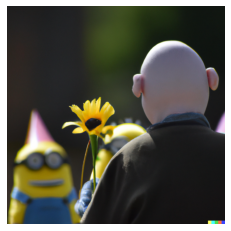

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

deepfake = Image.open('fake-gru.png')
plt.imshow(deepfake)
plt.axis('off')
plt.show()

Well, an image on a computer is made of bytes, just like a string! The SHA-256 algorithm actually is very similar for images.

In [27]:
def hash_img_str(img): # hashes the bytes of an image using SHA-256
    return hashlib.sha256(img.tobytes()).hexdigest()
def hash(x): # make sure our hash function supports both images and strings
    try:
        return int(hash_img_str(x), 16)
    except:
        return int(hash_str(x), 16)
print("Hash of the image:\n", hash_img_str(deepfake))
print("Hash in base 10:\n", hash(deepfake))
print("Hash again (should be the same):\n", hash_img_str(deepfake))

Hash of the image:
 fe7d65a4ad55067a4b33e736edf2fbf102c6d2377f22ae42892ae282fcafd58b
Hash in base 10:
 115109020939313243787451818296101220769706635215876944350690779455810826130827
Hash again (should be the same):
 fe7d65a4ad55067a4b33e736edf2fbf102c6d2377f22ae42892ae282fcafd58b


Let's try this with the signature scheme we implemented.

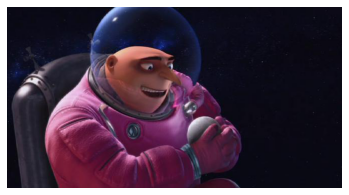

In [24]:
realimg = Image.open('real-gru.jpg')
plt.imshow(realimg)
plt.axis('off')
plt.show()

In [25]:
# Gru's perspective
# TODO: fill this in with realimg and gru_sk, Gru's secret key
sign_real_img = dsa_sign(message=realimg, sk=gru_sk)

# Vector's perspective
# TODO: fill this in with deepfake and vector_sk, Vector's secret key
sign_fake_img = dsa_sign(message=deepfake, sk=vector_sk)

# The world's perspective
# TODO: fill this in with realimg, Gru's signed realimg, and Gru's verification key
verify_gru = dsa_verify(message=realimg, signature=sign_real_img, vk=gru_vk)
assert(verify_gru is True)
# TODO: fill this in with deepfake, Vector's fake signed deepfake, and Gru's verification key
verify_vector = dsa_verify(message=deepfake, signature=sign_fake_img, vk=gru_vk)
assert(verify_vector is False)

### Good job! You saved Gru's evil reputation and stopped Vector!
![Vector on the moon](https://wallpapers.com/images/hd/despicable-me-villain-vector-3t80vfhyu747senz.jpg)